# Лабораторная работа 4. Визуализация данных

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, plot, iplot
import plotly.graph_objs as go
import seaborn as sns

In [38]:
df = pd.read_csv("../datasets/gender_classification.csv")
df['gender'] = pd.Categorical(df.gender).codes
df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
5,1,13.0,6.8,1,1,1,1,1
6,1,15.3,6.2,1,1,1,0,1
7,0,13.0,5.2,0,0,0,0,0
8,1,11.9,5.4,1,0,1,1,0
9,1,12.1,5.4,0,0,0,0,0


In [39]:
# Уберем из данных несколько записей про мужчин
shuffled_df = df.sample(frac=1,random_state=4)
CHD_df = shuffled_df.loc[shuffled_df['gender'] == 0]
non_CHD_df = shuffled_df.loc[shuffled_df['gender'] == 1].sample(n=1000,random_state=4)
df = pd.concat([CHD_df, non_CHD_df])

In [40]:
df_ = df.drop(columns=['nose_long'])

# Данные отображаются в виде линий на графике

<AxesSubplot: >

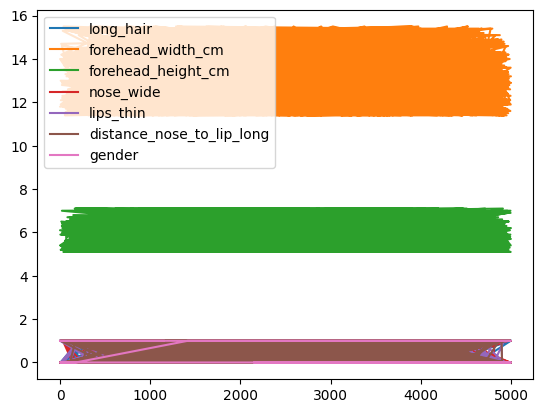

In [56]:
df_.plot()

# Гистаграммы распределения частоты значений в наборе данных

<AxesSubplot: >

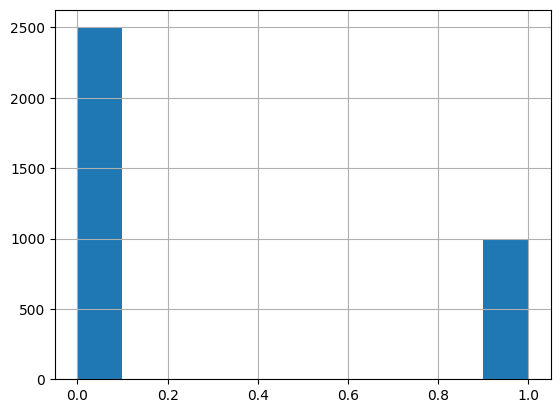

In [60]:
df['gender'].hist()

<AxesSubplot: >

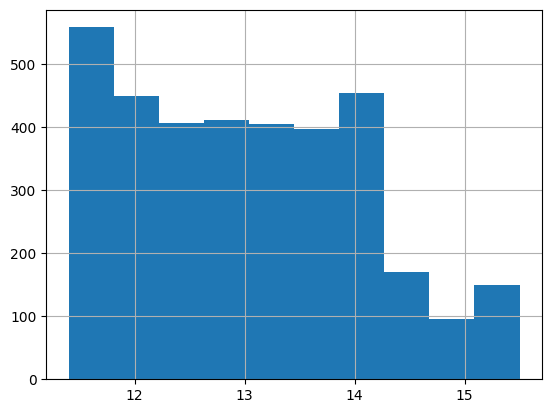

In [61]:
df['forehead_width_cm'].hist()

<AxesSubplot: >

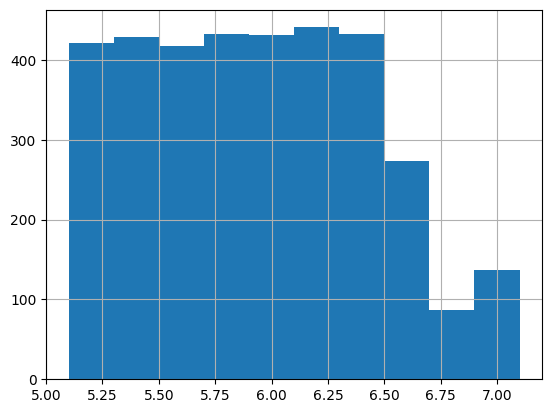

In [62]:
df['forehead_height_cm'].hist()

# Точечный график X- gender, Y- forehead_width_cm

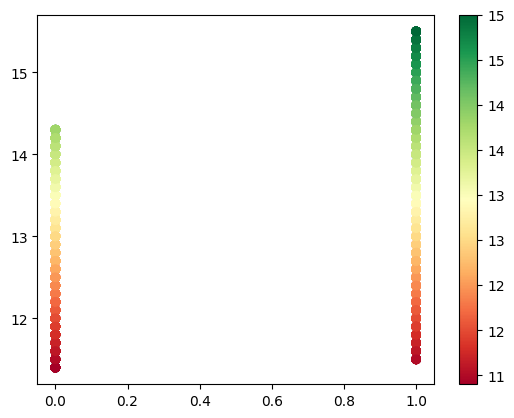

In [65]:
sctr = plt.scatter(x=df['gender'], y=df['forehead_width_cm'], c=df['forehead_width_cm'], cmap='RdYlGn')
# Добавляет цветовую шкалу
plt.colorbar(sctr, format='%d')

In [66]:
d = df.groupby('gender', sort=True).size().sort_values(ascending = False)
#выводим первые 10
d=d.head(10)
d

gender
0    2501
1    1000
dtype: int64

In [47]:
trace0 = go.Scatter(
    x=d.index,
    y=d.values,
    name='Count'
)

# объединяем графические объекты и задаем title графика в layout
data = [trace0]
layout = {'title': 'Статистика пользователей по гендеру'}

# cоздаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
#fig.show()
iplot(fig, show_link=False) # не показывать ссылку на экспортирование полотна

In [48]:
# создаем объект для визуализации
trace0 = go.Bar(
    x=d.index,
    y=d.values,
    name='Count'
)

# объединяем графические объекты и задаем title графика в layout
data = [trace0]
layout = {'title': 'Статистика пользователей по гендеру', 'xaxis': {'title': 'гендер'}}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

# Ящик с усами

In [49]:
# создаем ящик с усами для каждого жанра из наших данных
fig = go.Figure()
fig.add_trace(go.Box(x=df['gender'], boxpoints='all'))
fig.show()

# Гистаграмма распределения значений

In [67]:
fig = go.Figure(data=[go.Histogram(x=df['gender'])])
fig.show()

# Круговая диаграмма данных на основе 10 значений

In [68]:
fig = go.Figure()
fig.add_trace(go.Pie(values=d.values, labels=d.index))
fig.show()